ConnectionS Model

In [62]:
import cv2
import matplotlib as plt
config_file ="ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"
frozen_model = "frozen_inference_graph.pb"

Model

In [63]:
model = cv2.dnn_DetectionModel(frozen_model,config_file)

Labels Extraction

In [64]:
classLabels = []
filename = "labels.txt"
with open(filename,'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')

print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [65]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 0000023881CA2490>

Reading a image

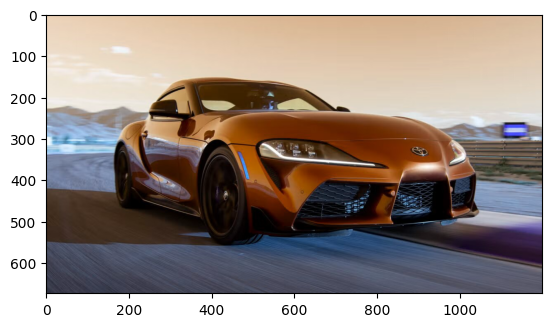

In [66]:
import matplotlib.pyplot as plt
img = cv2.imread('supra.jpg')

plt.imshow(img)

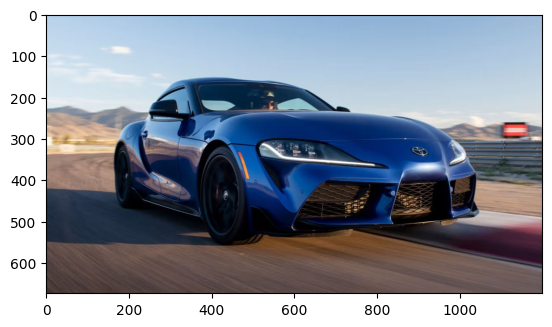

In [67]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [68]:
ClassIndex, confidence , bbox = model.detect(img,confThreshold=0.5)
print(ClassIndex)

[3]


Detection Output

In [69]:
import cv2

font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

# Loop through detections
for ClassIndex, confidence, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
    # Unpack bounding box coordinates
    x, y, w, h = boxes
    
    # Draw the rectangle around the detected object
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), thickness=2)
    
    # Add label text to the rectangle
    label = classLabels[ClassIndex - 1]
    cv2.putText(img, label, (x + 10, y + 40), font, fontScale=font_scale, color=(0, 255, 0), thickness=3)


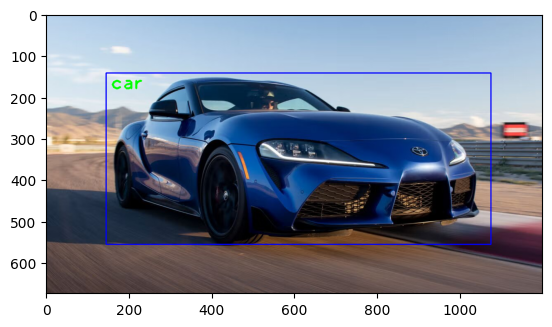

In [70]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

Video Detection

In [71]:
import cv2

# Open video file
cap = cv2.VideoCapture("video.mp4")
if not cap.isOpened():
    cap = cv2.VideoCapture(0)  # You can replace 0 with a different video file path if needed
if not cap.isOpened():
    raise IOError("Cannot open video")

# Font for text
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret, frame = cap.read()
    if not ret:
        break  # If frame is not read correctly, break the loop
    
    # Detect objects
    ClassIndex, confidence, bbox = model.detect(frame, confThreshold=0.55)
    # print(ClassIndex)
    
    # Check if any detections are made
    if len(ClassIndex) > 0:
        for ClassIndex, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
            # Draw the rectangle around the detected object
            cv2.rectangle(frame, (boxes[0], boxes[1]), (boxes[0] + boxes[2], boxes[1] + boxes[3]), (255, 0, 0), 2)
            
            # Add text (class label)
            label = classLabels[ClassIndex - 1]
            cv2.putText(frame, label, (boxes[0] + 10, boxes[1] + 40), font, fontScale=font_scale, color=(0, 255, 0), thickness=3)
    
    # Display the frame with detections
    cv2.imshow('Object Detection - Video', frame)
    
    # Press 'q' to exit the loop
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture and close all windows
cap.release()
cv2.destroyAllWindows()
